In [1]:
# markdown settings
from IPython.display import display, HTML # type:ignore
style = '<style> body { font-family: Cambria; font-size: 16px; } </style>' 
display(HTML(style))

In [104]:
# major imports
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import math
import numpy as np


RNNs can analyze time
series data, such as the number of daily active users on your website, the
hourly temperature in your city, your home’s daily power consumption, the
trajectories of nearby cars, and more. Once an RNN learns past patterns in the
data, it is able to use its knowledge to forecast the future, assuming of course
that past patterns still hold in the future.

It can take sentences, documents,
or audio samples as input, making them extremely useful for natural language
processing applications such as automatic translation or speech-to-text

# <div style="font-family:fantasy;">Recurrent Neurons and Layers</div>

A recurrent neural network looks very much like a feedforward neural
network, except it also has connections pointing backward.

At each time step t (also called a frame), this recurrent
neuron receives the inputs $\mathbf{x}_{(t)}$  as well as its own output from the previous
time step, $ŷ$ . Since there is no previous output at the first time step, it is
generally set to 0. We can represent this tiny network against the time axis, as shown. This is called unrolling the network through
time (it’s the same recurrent neuron represented once per time step)

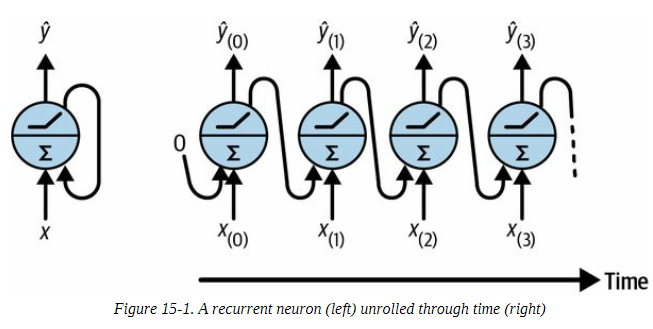

At each time step t, every
neuron receives both the input vector $\mathbf{x}_{(t)}$  and the output vector from the
previous time step $ŷ_{(t-1)}$

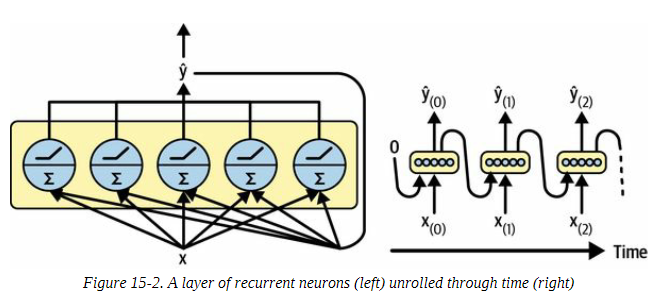

each recurrent neuron has two sets of weights one from the direct input at time t and another from the ouput at time t-1. we call them vectors $\mathbf{w}_x$ and $\mathbf{w}_{\hat{y}}$. If we consider the whole layer we can construct a vector of two weights in matrices $\mathbf{W}_x$ and $\mathbf{W}_{\hat{y}}$.

The output of the entire later can be computed using the Eqn:

$\hat{y}(t)=\phi({\mathbf{W}_x}^{T}x(t)+{\mathbf{W}_{\hat{y}}}^{T}\hat{y}(t-1)+\mathbf{b})$

where $\mathbf{b}$ is the bias vector.

Just as with feedforward neural networks, we can compute a recurrent layer’s
output in one shot for an entire mini-batch by placing all the inputs at time
step t into an input matrix $\mathbf{X}_t$
$$
\begin{aligned}
\hat{Y}(t) &= \phi(X(t) W_x + \hat{Y}(t-1) W_{\hat{y}} + b) \\
&= \phi([X(t) \hat{Y}(t-1)] W + b )\quad \text{with} \quad W = \begin{bmatrix} W_x \\ W_y \end{bmatrix}
\end{aligned}
$$


* Ŷ<sub>t</sub>  is an m × n<sub>neurons</sub>  matrix containing the layer’s outputs at time step t
for each instance in the mini-batch (m is the number of instances in the
mini-batch and n<sub>neurons</sub>  is the number of neurons)

* X  is an m × n<sub>input</sub>  matrix containing the inputs for all instances (n<sub>input</sub>
is the number of input features)

* W<sub>x</sub>  is an n<sub>neurons</sub>  × n<sub>input</sub>  matrix containing the connection weights for
the inputs of the current time step.

* W<sub>ŷ</sub>  is an n<sub>neurons</sub>  × n<sub>neurons</sub>  matrix containing the connection weights for the outputs of the previous time step.

* b is a vector of size n<sub>neurons</sub>  containing each neuron’s bias term.

* The weight matrices W<sub>x</sub>   and W<sub>ŷ</sub>  are often concatenated vertically into a single weight matrix W of shape (n<sub>inputs</sub>  + n<sub>neurons</sub> ) × n<sub>neurons</sub>.

* The notation [X $_t$  Ŷ $_{t-1}$ ] represents the horizontal concatenation of the
matrices X $_t$  and Ŷ $_{t-1}$ .

Thus we can say $\hat{Y}_{t}$ is a function of all the inputs from 0 to t. At the
first time step, t = 0, there are no previous outputs, so they are typically
assumed to be all zeros

### <div style="font-family:fantasy;">memory cells</div>
Since the output of a recurrent neuron at time step t is a function of all the
inputs from previous time steps, you could say it has a form of memory. A
part of a neural network that preserves some state across time steps is called a
memory cell (or simply a cell). A single recurrent neuron, or a layer of
recurrent neurons, is a very basic cell, capable of learning only short patterns
(typically about 10 steps long, but this varies depending on the task)

A cell's memory state at a time t is denoted by h<sub>(t)</sub> (h for hidden) and is a function of the input at the current time step and state at the previous time step or <b>h</b><sub>(t)</sub> = *f*(<b>x</b><sub>(<i>t</i>)</sub>,<b>h</b><sub>(<i>t</i>-1)</sub>). It's output at time step t is denoted by $\hat{\mathbf{y}}$<sub>(<i>t</i>)</sub> is also a function of previous state and current input.

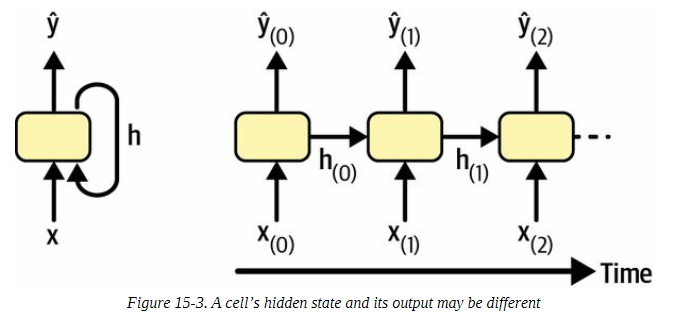


# <div style="font-family:fantasy;">Input and output sequences</div>
An RNN can simultaneously take a sequence of inputs and produce a
sequence of outputs (see the top-left network in Figure 15-4). This type of
sequence-to-sequence network is useful to forecast time series, such as your
home’s daily power consumption: you feed it the data over the last N days,
and you train it to output the power consumption shifted by one day into the
future (i.e., from N – 1 days ago to tomorrow)

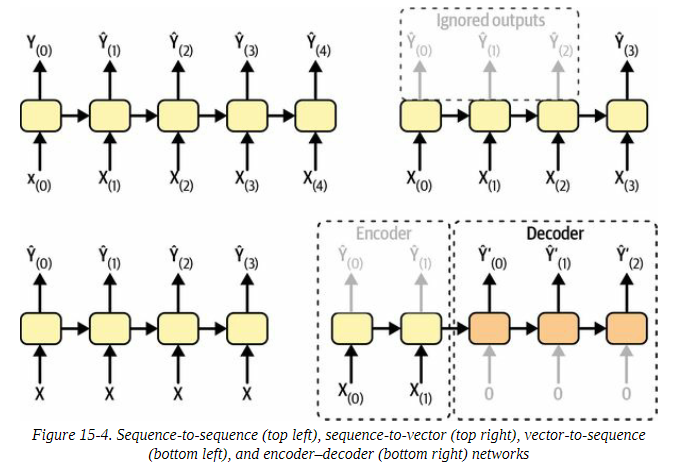

Alternatively, you could feed the network a sequence of inputs and ignore all
outputs except for the last one (see the top-right network in Figure 15-4).
This is a sequence-to-vector network. 

Conversely, you could feed the network the same input vector over and over
again at each time step and let it output a sequence (see the bottom-left
network of Figure 15-4). This is a vector-to-sequence network. For example,
the input could be an image (or the output of a CNN), and the output could be
a caption for that image.

Lastly, you could have a sequence-to-vector network, called an encoder,
followed by a vector-to-sequence network, called a decoder (see the bottom
right network of Figure 15-4). For example, this could be used for translating
a sentence from one language to another. You would feed the network a
sentence in one language, the encoder would convert this sentence into a
single vector representation, and then the decoder would decode this vector
into a sentence in another language. This two-step model, called an encoder–
decoder,⁠  works much better than trying to translate on the fly with a single
sequence-to-sequence RNN (like the one represented at the top left): the last
words of a sentence can affect the first words of the translation, so you need
to wait until you have seen the whole sentence before translating it

# <div style="font-family:fantasy;">Training Of RNNs</div>
The trick behind training RNN is to unroll the output through time and then use backpropagation. This is called backpropagation through time.

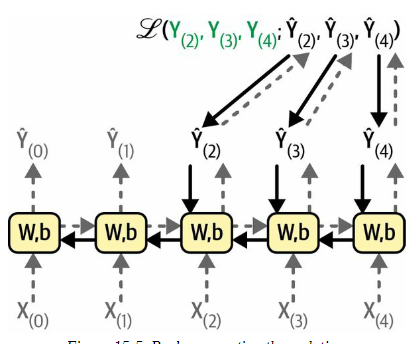

Just like in regular backpropagation, there is a first forward pass through the
unrolled network (represented by the dashed arrows). Then the output
sequence is evaluated using a loss function\
$\mathcal{L}$($Y_{(0)} , Y_{(1)} , ..., Y_{(T)}$ ; $Ŷ_{0} , Ŷ_{1} ,.., Ŷ_{T}$ )\
(where $Y_{i}$  is the i  target, $Ŷ_{i}$  is the i prediction and T is the time step). This loss function may ignore some of the ourput. Thus here loss function in the above diagram is computed only using 3 outputs (2,3,4). Also in sequence-to-vector RNN all outputs are ignored except the last one 

The gradients of that loss function are then propagated
backward through the unrolled network (represented by the solid arrows). In
this example, since the outputs $Ŷ_0, Ŷ_1$  are not used to compute the loss,
the gradients do not flow backward through them; they only flow through
$Ŷ_2 , Ŷ_3 ,$ and $Ŷ_4$ .

Moreover, since the same parameters W and b are used at
each time step, their gradients will be tweaked multiple times during
backprop. Once the backward phase is complete and all the gradients have
been computed, BPTT can perform a gradient descent step to update the
parameters (this is no different from regular backprop).

# <div style="font-family:fantasy;">Forecasting a Time Series</div>
Here we are intended to forecast the number of passengers that will ride on bus and rail the next day. here we have access to daily ridership data since 2001


In [3]:
from pathlib import Path
path = Path("data/ridership/CTA_-_Ridership_-_Daily_Boarding_Totals.csv")
df = pd.read_csv(path, parse_dates=["service_date"])
df.columns = ["date", "day_type", "bus", "rail", "total"]  # shorter names
df = df.sort_values("date").set_index("date")
df = df.drop("total", axis=1)  # no need for total, it's just bus + rail
df = df.drop_duplicates()  # remove duplicated months (2011-10 and 2014-07)


In [4]:
df

,day_type,bus,rail
date,,,
2001-01-01,U,297192,126455
2001-01-02,W,780827,501952
2001-01-03,W,824923,536432
2001-01-04,W,870021,550011
2001-01-05,W,890426,557917
...,...,...,...
2021-11-26,W,257700,189694
2021-11-27,A,237839,187065
2021-11-28,U,184817,147830


On January 1st, 2001, 297,192 people boarded a bus in Chicago, and 126,455
boarded a train. The day_type column contains W for Weekdays, A for
Saturdays, and U for Sundays or holidays

Now we shall plot the ridership figures over a month in 2019

<Axes: xlabel='date'>

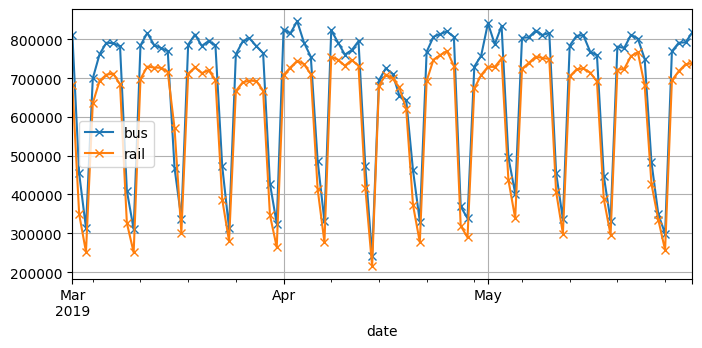

In [5]:
df["2019-03":"2019-05"].plot(grid=True,marker="x",figsize=(8,3.5))

This is
a time series: data with values at different time steps, usually at regular
intervals. More specifically, since there are multiple values per time step(bus and rail), this
is called a multivariate time series

Looking at Figure , we can see that a similar pattern is clearly repeated
every week. This is called a weekly seasonality. In fact, it’s so strong in this
case that forecasting tomorrow’s ridership by just copying the values from a
week earlier will yield reasonably good results. This is called naive
forecasting: simply copying a past value to make our forecast. Naive
forecasting is often a great baseline, and it can even be tricky to beat in some
cases.

To prove this we overlay the current time series and the one we can get by lagging the data by one week using the dotted lines. We’ll also plot the difference between
the two (i.e., the value at time t minus the value at time t – 7); this is called
*differencing*.


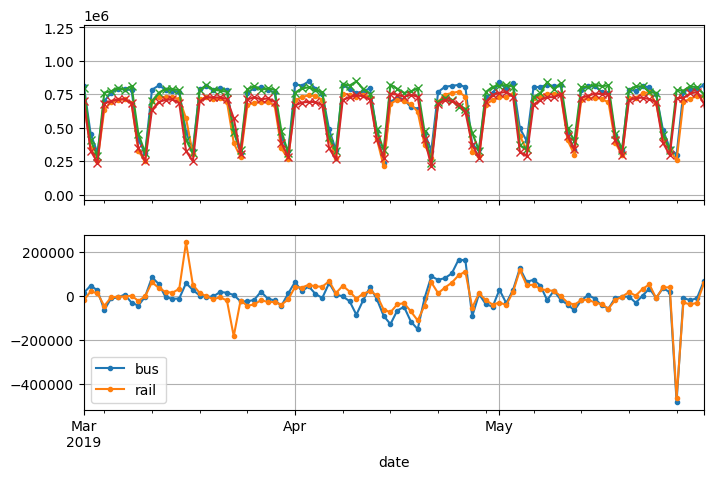

In [6]:
diff_7 = df[["bus", "rail"]].diff(7)["2019-03":"2019-05"]
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
df.plot(ax=axs[0], legend=False, marker=".")  # original time series
df.shift(7).plot(ax=axs[0], grid=True, legend=False,marker="x")  # lagged
diff_7.plot(ax=axs[1], grid=True, marker=".")  # 7-day difference time series
plt.show()

As we can say there is fairly no difference except suring the end of may. So we check the day type in that period

In [7]:
list(df.loc["2019-05-25":"2019-05-27"]["day_type"])

['A', 'U', 'U']

Thus there was a long holiday break which did result in affecting the shifting 

Now we measure the mean absolute error over the three-month period we’re
arbitrarily focusing on—March, April, and May 2019—to get a rough idea:

In [8]:
diff_7.abs().mean()

bus     43915.608696
rail    42143.271739
dtype: float64

thus we infer from MAE(mean abs error) that about 43,916 bus riders and 42143 rail riders. To know how good or bad they are lets check by measuring forecasting error

In [9]:
targets = df[["bus","rail"]]["2019-03":"2019-05"]
(diff_7/targets).abs().mean()

bus     0.082938
rail    0.089948
dtype: float64

Thus we neary get 8% and 9% error for bus and rail respectively. Now note that  MAE for the rail
forecasts looks slightly better than the MAE for the bus forecasts, while the
opposite is true for the MAPE. That’s because the bus ridership is larger than
the rail ridership, so naturally the forecast errors are also larger, but when we
put the errors into perspective, it turns out that the bus forecasts are actually
slightly better than the rail forecasts.

Now we check if there is any yearly seasonality.

In [10]:
df.head()

,day_type,bus,rail
date,,,
2001-01-01,U,297192,126455
2001-01-02,W,780827,501952
2001-01-03,W,824923,536432
2001-01-04,W,870021,550011
2001-01-05,W,890426,557917


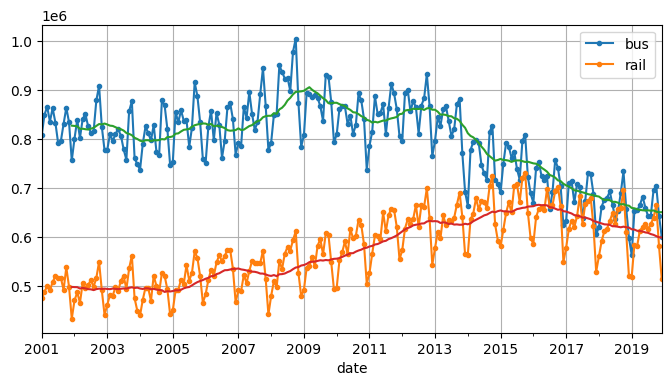

In [11]:
period = slice("2001", "2019")
df_monthly = df[["bus","rail"]].resample('M').mean()  # compute the mean for each month
rolling_average_12_months = df_monthly[period].rolling(window=12).mean()
fig, ax = plt.subplots(figsize=(8, 4))
df_monthly[period].plot(ax=ax, marker=".")
rolling_average_12_months.plot(ax=ax, grid=True, legend=False)
plt.show()




Thus there is yearly seasonality though it is more noisier also the seasonality is more prominent for the rail than bus.

 Let’s
check what we get if we plot the 12-month difference 

<Axes: xlabel='date'>

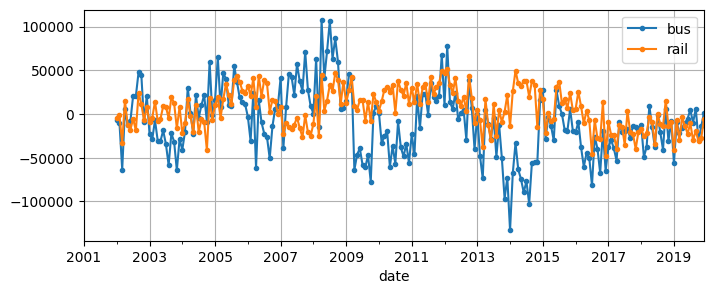

In [12]:
df_monthly.diff(12)[period].plot(grid=True,marker=".",figsize=(8,3))

Once
you’re able to make accurate forecasts on the differenced time series, it’s
easy to turn them into forecasts for the actual time series by just adding back
the past values that were previously subtracted.

### <div style="font-family:fantasy;">The ARMA Model</div>
* Auto Regressive moving average model.
* computes its forecast using simple weighted sum of the lagged values and corrects it by adding a moving average. Mathematically, 
$\hat{y}(t) = \sum_{i=1}^{p}\alpha_i y(t-i) + \sum_{i=1}^{q}\theta_i \epsilon(t-i)$\
where $\epsilon(t) = y(t) - \hat{y}(t)$ that is lagging difference.

Here the first term being the *autoregressive* component of the model. $\alpha_i$ being the weight learnt. $p$ is the hyperparameter suggesting how far in time the model should look back. This peforms regression based on past values and tries to best fit $\alpha$.

The second term is the moving average component of the model. Where $\theta_i$ is the learnt weight and the sum is weighted sum over the last $q$ forecast errors.

**differencing**\
This model assumes that the time series is stationary. If not then we use differencing. Using differencing over a single step gives approximation of the slope of the curve of the time series. This means it will eliminate any linear trend and transform it into constant value. or example, if you apply one-step differencing
to the series [3, 5, 7, 9, 11], you get the differenced series [2, 2, 2, 2]. If the original time series has a quadratic trend instead of a linear trend, then a single
round of differencing will not be enough. For example, the series [1, 4, 9, 16, 25, 36]
becomes  [3,  5,  7,  9,  11]  after  one  round  of  differencing,  but  if  you  run  differencing for a second round, then you get [2, 2, 2, 2]. More generally, running $d$ consecutive rounds of differencing computes an approimation of the d-order derivative of the time series thus eliminating plynomial trends upto degree $d$. Here $d$ is _order of integration_.

<div style="border:2px solid;border-radius:4px;width:50vw;">
<b>The ARIMA model</b>: autoregressive integrated moving average this model runs d rounds of differencing to make
the time series more stationary, then it applies a regular ARMA model. When making
forecasts, it uses this ARMA model, then it adds back the terms that were subtracted
by differencing
</div>
<div style="border:2px solid;border-radius:4px;width:50vw;">
<b>SARIMA</b>: Seasonal ARIMA. It works in the same way as ARIMA but additionally models a seasonal component for a given frequency(example weekly) using same ARIMA approach. 

It  has  a  total  of  seven  hyperparameters:  the  same  p,  d,  and  q
hyperparameters  as  ARIMA,  plus  additional  P,  D,  and  Q  hyperparameters  to  model the  seasonal  pattern,  and  lastly  the  period  of  the  seasonal  pattern,  noted  s. 

The
hyperparameters P, D, and Q are just like p, d, and q, but they are used to model the
time series at t – s, t – 2s, t – 3s, etc.
</div>

In [13]:
# here we are using SARIMA to model the rail time series 
# for the ridership and use to make a forecast for tomorrow ridership.
# we forecast for 1 June 2019 considering the data till 31 May 2019

from statsmodels.tsa.arima.model import ARIMA
# here in this API we pass the data to the model at the construction time instead of
# passing it to the fit() method in the sklearn APIs
origin,today = '2019-01-01', '2019-05-31'
rail_series = df[origin:today]['rail'].asfreq('D') #here we set the time series 
                                                    # frequency to daily
                                                    #but here it is not affected as it 
                                                    # daily by default
                                                    #if we remove that it just shows an warning
model = ARIMA(rail_series,
              order=(1,0,0), #p=1,d=0,q=0
              seasonal_order=(0,1,1,7)) # P=0,D=1,Q=1 and s=7
model = model.fit()
y_pred = model.forecast() # it is similar to predict method in sklearn 
y_pred

2019-06-01    427758.626286
Freq: D, dtype: float64

The  forecast  is  427,759  passengers,  when  in  fact  there  were  379,044.  Yikes,  we’re
12.9% off—that’s pretty bad

In [14]:
# now we run the same code in a loop to make forecast for every day in march april and may.
origin, start,end = '2019-01-01','2019-03-01','2019-05-31'
time_period = pd.date_range(start,end)
rail_series = df[origin:end]['rail'].asfreq('D')
y_preds = list()
for today in time_period.shift(-1): #type: ignore
    model = ARIMA(rail_series[origin:today], # we train on data upto today
              order=(1,0,0),
              seasonal_order=(0,1,1,7)) 
    model = model.fit() # we retain the model everyday
    y_pred = model.forecast()[0]
    y_preds.append(y_pred)
y_preds = pd.Series(y_preds,index=time_period)
mae = (y_preds - rail_series[time_period]).abs().mean()
mae
    

32040.720089838298

This is significantly better than what we got from naive forecasting, which was more than 42000 for rail.

Now the naive method to choose the hyperparameters being ofcourse grid search.
you  can  run
the preceding code example, changing only the hyperparameter values. Good p, q, P,
and Q values are usually fairly small (typically 0 to 2, sometimes up to 5 or 6), and d
and  D  are  typically  0  or  1,  sometimes  2.  As  for  s,  it’s  just  the  main  seasonal  pattern’s
period: in our case it’s 7 since there’s a strong weekly seasonality. The model with the
lowest MAE wins

### <div style="font-family:fantasy;">Preparing the data for machine learning models</div>

Our  goal  will  be  to  forecast  tomorrow’s  ridership  based
on  the  ridership  of  the  past  8  weeks  of  data  (56  days).  The  inputs  to  our  model
will  therefore  be  sequences  (usually  a  single  sequence  per  day  once  the  model  is  in
production),  each  containing  56  values  from  time  steps  t  –  55  to  t.  For  each  input
sequence, the model will output a single value: the forecast for time step t + 1

The training data shall be every 56 day window form the past and the target for each window will be the value immediately following it.



here's a demo for using the keras' `timeseries_dataset_from_array` function which takes an timeseries as input and builds a `tf.data.Dataset`

In [15]:
myseries = [0,1,2,3,4,5]
mydataset = tf.keras.utils.timeseries_dataset_from_array(
    myseries,
    targets=myseries[3:],#targets are 3 steps into future thus the targets shall be 3,4 and 5
    sequence_length=3, #sequence in each batch shall be of length 3
    batch_size=2 # the output is in batches of 2
)
for i in list(mydataset):
    print(i)
    print() 


(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [1, 2, 3]])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 4])>)

(<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[2, 3, 4]])>, <tf.Tensor: shape=(1,), dtype=int32, numpy=array([5])>)



Each  sample  in  the  dataset  is  a  window  of  length  3,  along  with  its  corresponding
target  (i.e.,  the  value  immediately  after  the  window).  The  windows  are  [0,  1,  2],  [1,
2,  3],  and  [2,  3,  4],  and  their  respective  targets  are  3,  4,  and  5.  Since  there  are  three
windows in total, which is not a multiple of the batch size, the last batch only contains
one window instead of two.

Another method is the window method

In [137]:
for i in list(tf.data.Dataset.range(6)):
    print(i)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)


In [16]:
for window_dataset in tf.data.Dataset.range(6).window(4,shift=1):
    for element in window_dataset:
        print(f'{element}',end=' ')
    print()

0 1 2 3 
1 2 3 4 
2 3 4 5 
3 4 5 
4 5 
5 


In this example, the dataset contains six windows each of size 4 and each shifted by one step compared
to  the  previous  one,  and  the  last  three  windows  are  smaller  because  they’ve  reached
the  end  of  the  series

we can get rid of the smaller windows py passing `drop_remainder=True`

In [17]:
for window_dataset in tf.data.Dataset.range(6).window(4,shift=1,drop_remainder=True):
    for element in window_dataset:
        print(f'{element}',end=' ')
    print()

0 1 2 3 
1 2 3 4 
2 3 4 5 


the window method returns datasets while our models require tensors thus we use something called as flatmap. it  converts  a  nested  dataset  into  a
flat  dataset  (one  that  contains  tensors,  not  datasets).  For  example,  suppose  {1,  2,  3}
represents  a  dataset  containing  the  sequence  of  tensors  1,  2,  and  3.  If  you  flatten  the
nested dataset {{1, 2}, {3, 4, 5, 6}}, you get back the flat dataset {1, 2, 3, 4, 5, 6}.

`flat_map()` method takes a function as an argument, which allows you
to transform each dataset in the nested dataset before flattening. For example, if you
pass the function lambda ds: ds.batch(2) to flat_map(), then it will transform the
nested dataset {{1, 2}, {3, 4, 5, 6}} into the flat dataset {[1, 2], [3, 4], [5, 6]}: it’s a dataset
containing 3 tensors, each of size 2.



In [142]:
dataset = tf.data.Dataset.range(6).window(4,shift=1,drop_remainder=True)
dataset = dataset.flat_map(lambda window_dataset: window_dataset.batch(4))

for element in dataset:
    print(f'{element}')

[0 1 2 3]
[1 2 3 4]
[2 3 4 5]


Since each window dataset contains exactly four items, calling batch(4) on a window
produces a single tensor of size 4

we declare a small helper function to make it easier to extract windows from dataset

In [143]:
def to_windows(dataset,length):
    dataset = dataset.window(length, shift=1, drop_remainder=True)
    return dataset.flat_map(lambda window_db:window_db.batch(length))

now the last most important thing is to split it into inputs and targets using `map()` method

In [144]:
dataset = to_windows(tf.data.Dataset.range(6), 4)

In [146]:
list(dataset)

[<tf.Tensor: shape=(4,), dtype=int64, numpy=array([0, 1, 2, 3], dtype=int64)>,
 <tf.Tensor: shape=(4,), dtype=int64, numpy=array([1, 2, 3, 4], dtype=int64)>,
 <tf.Tensor: shape=(4,), dtype=int64, numpy=array([2, 3, 4, 5], dtype=int64)>]

In [147]:
dataset = dataset.map(lambda window: (window[:-1], window[-1]))

In [148]:
list(dataset)

[(<tf.Tensor: shape=(3,), dtype=int64, numpy=array([0, 1, 2], dtype=int64)>,
  <tf.Tensor: shape=(), dtype=int64, numpy=3>),
 (<tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 2, 3], dtype=int64)>,
  <tf.Tensor: shape=(), dtype=int64, numpy=4>),
 (<tf.Tensor: shape=(3,), dtype=int64, numpy=array([2, 3, 4], dtype=int64)>,
  <tf.Tensor: shape=(), dtype=int64, numpy=5>)]

In [23]:
list(dataset.batch(2))

[(<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
  array([[0, 1, 2],
         [1, 2, 3]], dtype=int64)>,
  <tf.Tensor: shape=(2,), dtype=int64, numpy=array([3, 4], dtype=int64)>),
 (<tf.Tensor: shape=(1, 3), dtype=int64, numpy=array([[2, 3, 4]], dtype=int64)>,
  <tf.Tensor: shape=(1,), dtype=int64, numpy=array([5], dtype=int64)>)]

now we split our dataset into training, test and validation set on the rail ridership data. Also we divide it by $10^6$ for scaling the input down to ensure that the values are between 0 and 1.

In [24]:
rail_train = df["rail"]["2016-01":"2018-12"] / 1e6
rail_valid = df["rail"]["2019-01":"2019-05"] / 1e6
rail_test = df["rail"]["2019-06":] / 1e6

note that we can not only split a time series along the time but also along the dimension. 

For  example,  if  you  have  data  about  the  financial  health  of
10,000  companies  from  2001  to  2019,  you  might  be  able  to  split
this  data  across  the  different  companies.  It’s  very  likely  that  many
of  these  companies  will  be  strongly  correlated,  though  (e.g.,  whole
economic  sectors  may  go  up  or  down  jointly),  and  if  you  have
correlated  companies  across  the  training  set  and  the  test  set,  your
test  set  will  not  be  as  useful,  as  its  measure  of  the  generalization
error will be optimistically biased.

Now we create training and validation datasets for our model. Since gradient descent expects the instances in the training set to be independent and identically distributed we must shuffle it.

In [25]:
window_length = 56
train_ds = tf.keras.utils.timeseries_dataset_from_array(
    rail_train.to_numpy(),
    targets = rail_train[window_length:],
    sequence_length=window_length,
    batch_size=32,
    shuffle=True,
    seed=42
)

In [26]:
valid_ds = tf.keras.utils.timeseries_dataset_from_array(
    rail_valid.to_numpy(),
    targets=rail_valid[window_length:],
    sequence_length=window_length,
    batch_size=32
)

### <div style="font-family:Fantasy;">Forecasting Using a Linear Model</div>
Here we are using Huber loss instead of MAE and we also use early stopping.

<div style='font-family:consolas'>revision: early stopping is a method of regularization it refers to stop the training as soon as the validation error reaches the minimum so as to protect from overfitting. It was certified by geoffrey hinton</div>

In [51]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[window_length])
])

In [52]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_mae',patience=50,restore_best_weights=True
)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02,momentum=0.9)

In [53]:
model.compile(loss = tf.keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])


In [54]:
history = model.fit(train_ds,validation_data=valid_ds,epochs=350,callbacks=[early_stopping_cb])

Epoch 1/350


33/33 [==============================] - 1s 12ms/step - loss: 0.1024 - mae: 0.3605 - val_loss: 0.0097 - val_mae: 0.1150
Epoch 2/350
33/33 [==============================] - 0s 6ms/step - loss: 0.0152 - mae: 0.1334 - val_loss: 0.0056 - val_mae: 0.0808
Epoch 3/350
33/33 [==============================] - 0s 7ms/step - loss: 0.0084 - mae: 0.0916 - val_loss: 0.0045 - val_mae: 0.0704
Epoch 4/350
33/33 [==============================] - 0s 6ms/step - loss: 0.0075 - mae: 0.0853 - val_loss: 0.0044 - val_mae: 0.0670
Epoch 5/350
33/33 [==============================] - 0s 7ms/step - loss: 0.0067 - mae: 0.0800 - val_loss: 0.0038 - val_mae: 0.0619
Epoch 6/350
33/33 [==============================] - 0s 10ms/step - loss: 0.0072 - mae: 0.0851 - val_loss: 0.0037 - val_mae: 0.0607
Epoch 7/350
33/33 [==============================] - 0s 6ms/step - loss: 0.0064 - mae: 0.0805 - val_loss: 0.0042 - val_mae: 0.0680
Epoch 8/350
33/33 [==============================] - 0s 8ms/step - loss: 0.0061 - mae: 0.0790

In [55]:
model.evaluate(valid_ds)[1] * 1e6 # evaluate return two values loss and mae thus the code

3/3 [==============================] - 0s 5ms/step - loss: 0.0022 - mae: 0.0374


37438.180297613144

Now the MAE is better than naive forecasting but worse than SARIMA

### <div style="font-family:Fantasy">Forecasting Using Simple RNN</div>
we use simple RNN constaining single recurrent layer with just one recurrent neuron

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(1,input_shape=[None,1])
])

In [49]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_mae", patience=50, restore_best_weights=True)
opt = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=["mae"])
history = model.fit(train_ds, validation_data=valid_ds, epochs=500,
                    callbacks=[early_stopping_cb])

Epoch 1/500
33/33 [==============================] - 4s 31ms/step - loss: 0.5044 - mae: 0.8957 - val_loss: 0.0178 - val_mae: 0.1500
Epoch 2/500
33/33 [==============================] - 1s 21ms/step - loss: 0.0530 - mae: 0.2692 - val_loss: 0.0693 - val_mae: 0.3278
Epoch 3/500
33/33 [==============================] - 1s 14ms/step - loss: 0.0515 - mae: 0.2634 - val_loss: 0.0410 - val_mae: 0.2241
Epoch 4/500
33/33 [==============================] - 1s 16ms/step - loss: 0.0246 - mae: 0.1595 - val_loss: 0.0185 - val_mae: 0.1403
Epoch 5/500
33/33 [==============================] - 1s 16ms/step - loss: 0.0182 - mae: 0.1637 - val_loss: 0.0176 - val_mae: 0.1444
Epoch 6/500
33/33 [==============================] - 1s 14ms/step - loss: 0.0177 - mae: 0.1611 - val_loss: 0.0172 - val_mae: 0.1409
Epoch 7/500
33/33 [==============================] - 1s 18ms/step - loss: 0.0173 - mae: 0.1585 - val_loss: 0.0168 - val_mae: 0.1407
Epoch 8/500
33/33 [==============================] - 1s 13ms/step - loss: 0.

In [50]:
# finding the mae
valid_loss, valid_mae = model.evaluate(valid_ds)
valid_mae * 1e6

3/3 [==============================] - 0s 8ms/step - loss: 0.0103 - mae: 0.1028


102777.21285820007

Here the input shape is taken as 3D tensors of shape [batch size, time steps, dimensionality] where the dimensionality is 1 for univarate time series and more for multivariate time series. Recall  that  the  input_shape  argument  ignores  the  first  dimension (i.e.,  the  batch  size),  and  since  recurrent  layers  can  accept  input  sequences  of  any length, we can set the second dimension to None, which means “any size”. Lastly, since we’re  dealing  with  a  univariate  time  series,  we  need  the  last  dimension’s  size  to  be  1. This  is  why  we  specified  the  input  shape  [None, 1]:  it  means  “univariate  sequences
of any length”. Note that the datasets actually contain inputs of shape [batch size, time
steps], so we’re missing the last dimension, of size 1, but Keras is kind enough to add
it for us in this case.

This  model  works  exactly  as  we  saw  earlier:  the  initial  state  h(init)  is  set  to  0,  and  it
is  passed  to  a  single  recurrent  neuron,  along  with  the  value  of  the  first  time  step,
x(0).  The  neuron  computes  a  weighted  sum  of  these  values  plus  the  bias  term,  and  it
applies the activation function to the result, using the hyperbolic tangent function by
default. The result is the first output, y0. In a simple RNN, this output is also the new
state  h0.  This  new  state  is  passed  to  the  same  recurrent  neuron  along  with  the  next
input  value,  x(1),  and  the  process  is  repeated  until  the  last  time  step.  At  the  end,  the
layer just outputs the last value: in our case the sequences are 56 steps long, so the last
value is y55. All of this is performed simultaneously for every sequence in the batch, of
which there are 32 in this case

By default the recurrent layers return the final output(thus they are sequence-to-vector models) but to return the output y(t) at every step t we need to put `return_sequences = True` which then becomes sequence-to-sequence model. 

If we compile it we get an MAE of 100,000. Which is more than any method we have followed so far. Thus it is not good because of two reasons.
* As there is single neuron so it can look back to just one time step in the sequnce which is not enough. Thus it does have less parameters as well two input values h(t-1) and x(t) and bias term.

* the time series have values rangin from 0 to 1.4 but the default activation being tanh can only output values between -1 and 1.

<div style="font-family:consolas;">Revision:Every neuron computes the output based on the input given and the weight set on it using the following equation  ℎ<sub>W, b</sub> (X) = ϕ(XW + b). Here ϕ() is called the activation function. It can be anything sigmoid, tanh, heavyside etc.</div>

Thus lets make a new model this time with 32 neurons and we will add a dense output layer at the end.

In [56]:
univar_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, input_shape=[None, 1]),
    tf.keras.layers.Dense(1)  # no activation function by default
])

In [57]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_mae',patience=50,restore_best_weights=True
)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02,momentum=0.9)

In [58]:
univar_model.compile(loss = tf.keras.losses.Huber(),optimizer=optimizer,metrics=['mae'])

In [59]:
history = univar_model.fit(train_ds,validation_data=valid_ds,epochs=350,callbacks=[early_stopping_cb])

Epoch 1/350


33/33 [==============================] - 3s 33ms/step - loss: 0.0313 - mae: 0.1925 - val_loss: 0.0201 - val_mae: 0.1937
Epoch 2/350
33/33 [==============================] - 1s 14ms/step - loss: 0.0202 - mae: 0.1649 - val_loss: 0.0120 - val_mae: 0.1063
Epoch 3/350
33/33 [==============================] - 1s 13ms/step - loss: 0.0113 - mae: 0.1238 - val_loss: 0.0094 - val_mae: 0.1078
Epoch 4/350
33/33 [==============================] - 1s 14ms/step - loss: 0.0099 - mae: 0.1115 - val_loss: 0.0067 - val_mae: 0.1016
Epoch 5/350
33/33 [==============================] - 1s 15ms/step - loss: 0.0082 - mae: 0.0980 - val_loss: 0.0080 - val_mae: 0.1100
Epoch 6/350
33/33 [==============================] - 1s 18ms/step - loss: 0.0073 - mae: 0.0912 - val_loss: 0.0049 - val_mae: 0.0843
Epoch 7/350
33/33 [==============================] - 1s 17ms/step - loss: 0.0062 - mae: 0.0848 - val_loss: 0.0053 - val_mae: 0.0847
Epoch 8/350
33/33 [==============================] - 1s 15ms/step - loss: 0.0059 - mae: 

In [61]:
univar_model.evaluate(valid_ds)[1]*1e6

3/3 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0299


29927.168041467667

Now if we chekc the mae it gets down to 29,927 which is best so far even better than SARIMA.

### <div style="font-family:fantasy;">Forecasting using a deep RNN</div>


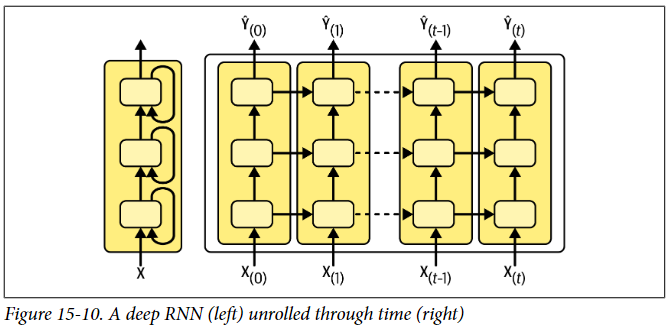

in keras while implementing we simply stack the simple rnn layers. Here we are using 3 simple rnn layers and stacking them up.The  first  two  are  sequence-to-sequence  layers,  and  the  last  one  is
a  sequence-to-vector  layer.  Finally,  the  Dense  layer  produces  the  model’s  forecast
(you  can  think  of  it  as  a  vector-to-vector  layer).  So  this  model  is  just  like  the  model
represented in Figure 15-10, except the outputs Ŷ(0) to Ŷ(t–1_) are ignored, and there’s a
dense layer on top of Ŷ(t), which outputs the actual forecast:

In [63]:
deep_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32,return_sequences=True,input_shape=[None,1]),
    tf.keras.layers.SimpleRNN(32,return_sequences=True),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

To train and evaluate it we make a simple function which can come handy further


In [64]:
def fit_and_evaluate(model, train_set, valid_set, learning_rate=0.02, epochs=500):
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor="val_mae", patience=50, restore_best_weights=True)
    opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    model.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=["mae"])
    history = model.fit(train_set, validation_data=valid_set, epochs=epochs,
                        callbacks=[early_stopping_cb])
    return model.evaluate(valid_set)[1]*1e6


In [65]:
fit_and_evaluate(deep_model,train_ds,valid_ds,0.02,350)

Epoch 1/350
33/33 [==============================] - 7s 54ms/step - loss: 0.0150 - mae: 0.1306 - val_loss: 0.0045 - val_mae: 0.0794
Epoch 2/350
33/33 [==============================] - 1s 32ms/step - loss: 0.0054 - mae: 0.0731 - val_loss: 0.0026 - val_mae: 0.0499
Epoch 3/350
33/33 [==============================] - 1s 32ms/step - loss: 0.0050 - mae: 0.0696 - val_loss: 0.0021 - val_mae: 0.0425
Epoch 4/350
33/33 [==============================] - 1s 36ms/step - loss: 0.0045 - mae: 0.0638 - val_loss: 0.0022 - val_mae: 0.0422
Epoch 5/350
33/33 [==============================] - 1s 36ms/step - loss: 0.0049 - mae: 0.0726 - val_loss: 0.0056 - val_mae: 0.0888
Epoch 6/350
33/33 [==============================] - 1s 34ms/step - loss: 0.0038 - mae: 0.0585 - val_loss: 0.0020 - val_mae: 0.0375
Epoch 7/350
33/33 [==============================] - 2s 45ms/step - loss: 0.0035 - mae: 0.0523 - val_loss: 0.0023 - val_mae: 0.0441
Epoch 8/350
33/33 [==============================] - 1s 36ms/step - loss: 0.

28782.980516552925

Make  sure  to  set  return_sequences=True  for  all  recurrent  layers
(except  the  last  one,  if  you  only  care  about  the  last  output).  If  you
forget to set this parameter for one recurrent layer, it will output a
2D array containing only the output of the last time step, instead of
a 3D array containing outputs for all time steps. The next recurrent
layer  will  complain  that  you  are  not  feeding  it  sequences  in  the
expected 3D format

on evaluating we get MAE as 28782 which is more than our simple RNN. 

### <div style="font-family:fantasy;">Forecasting multivariate time series</div>


Here we  try  to  forecast  the  rail  time  series  using  both  the  bus  and  rail  data  as  input. We also use the information of day type since we can know the information if the day is going to be a weekday weekend or a holiday. we can shift the day type series one day into the future, so that the model is given tomorrow’s day type as input

In [91]:
df_mulvar = df[["bus", "rail"]] / 1e6  # use both bus & rail series as input
df_mulvar["next_day_type"] = df["day_type"].shift(-1)  # we know tomorrow's type
df_mulvar = pd.get_dummies(df_mulvar)  # one-hot encode the day type
bool_column = ["next_day_type_A","next_day_type_U","next_day_type_W"]
df_mulvar[bool_column] = df_mulvar[bool_column].astype(int)


In [92]:
df_mulvar

,bus,rail,next_day_type_A,next_day_type_U,next_day_type_W
date,,,,,
2001-01-01,0.297192,0.126455,0,0,1
2001-01-02,0.780827,0.501952,0,0,1
2001-01-03,0.824923,0.536432,0,0,1
2001-01-04,0.870021,0.550011,0,0,1
2001-01-05,0.890426,0.557917,1,0,0
...,...,...,...,...,...
2021-11-26,0.257700,0.189694,1,0,0
2021-11-27,0.237839,0.187065,0,1,0
2021-11-28,0.184817,0.147830,0,0,1


In [93]:
mulvar_train = df_mulvar["2016-01":"2018-12"]
mulvar_valid = df_mulvar["2019-01":"2019-05"]
mulvar_test = df_mulvar["2019-06":]

In [94]:
tf.random.set_seed(42)  # extra code – ensures reproducibility
seq_length = window_length
train_mulvar_ds = tf.keras.utils.timeseries_dataset_from_array(
    mulvar_train.to_numpy(),  # use all 5 columns as input
    targets=mulvar_train["rail"][seq_length:],  # forecast only the rail series
    sequence_length=seq_length,
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_mulvar_ds = tf.keras.utils.timeseries_dataset_from_array(
    mulvar_valid.to_numpy(),
    targets=mulvar_valid["rail"][seq_length:],
    sequence_length=seq_length,
    batch_size=32
)

In [95]:
mulvar_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32,input_shape=[None,5]),
    tf.keras.layers.Dense(1)
])

In [96]:
fit_and_evaluate(mulvar_model,train_mulvar_ds,valid_mulvar_ds,0.02,300)

Epoch 1/300
33/33 [==============================] - 4s 32ms/step - loss: 0.0261 - mae: 0.1658 - val_loss: 0.0053 - val_mae: 0.0840
Epoch 2/300
33/33 [==============================] - 1s 15ms/step - loss: 0.0049 - mae: 0.0708 - val_loss: 0.0012 - val_mae: 0.0378
Epoch 3/300
33/33 [==============================] - 1s 13ms/step - loss: 0.0033 - mae: 0.0556 - val_loss: 9.1820e-04 - val_mae: 0.0330
Epoch 4/300
33/33 [==============================] - 1s 15ms/step - loss: 0.0027 - mae: 0.0497 - val_loss: 0.0022 - val_mae: 0.0579
Epoch 5/300
33/33 [==============================] - 1s 14ms/step - loss: 0.0023 - mae: 0.0460 - val_loss: 0.0020 - val_mae: 0.0532
Epoch 6/300
33/33 [==============================] - 1s 23ms/step - loss: 0.0020 - mae: 0.0431 - val_loss: 7.3310e-04 - val_mae: 0.0278
Epoch 7/300
33/33 [==============================] - 1s 30ms/step - loss: 0.0017 - mae: 0.0392 - val_loss: 6.7096e-04 - val_mae: 0.0259
Epoch 8/300
33/33 [==============================] - 1s 15ms/ste

23026.734590530396

The difference in this model and the univariate model is now the dimensionality is 5 not just 1. So our model recieves 5 inputs instead of 1. Now the MAE is 23026 which is better than previous models.

Now we make changes to the model so as to forecast both bus an rail ridership

In [98]:
tf.random.set_seed(42)

seq_length = 56
train_multask_ds = tf.keras.utils.timeseries_dataset_from_array(
    mulvar_train.to_numpy(),
    targets=mulvar_train[["bus", "rail"]][seq_length:],  # 2 targets per day
    sequence_length=seq_length,
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_multask_ds = tf.keras.utils.timeseries_dataset_from_array(
    mulvar_valid.to_numpy(),
    targets=mulvar_valid[["bus", "rail"]][seq_length:],
    sequence_length=seq_length,
    batch_size=32
)

tf.random.set_seed(42)
multask_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, input_shape=[None, 5]),
    tf.keras.layers.Dense(2)
])

fit_and_evaluate(multask_model, train_multask_ds, valid_multask_ds,0.02,300)

Epoch 1/300
33/33 [==============================] - 3s 28ms/step - loss: 0.0816 - mae: 0.2453 - val_loss: 0.0026 - val_mae: 0.0589
Epoch 2/300
33/33 [==============================] - 1s 16ms/step - loss: 0.0030 - mae: 0.0577 - val_loss: 0.0011 - val_mae: 0.0360
Epoch 3/300
33/33 [==============================] - 1s 13ms/step - loss: 0.0021 - mae: 0.0468 - val_loss: 0.0015 - val_mae: 0.0428
Epoch 4/300
33/33 [==============================] - 1s 13ms/step - loss: 0.0018 - mae: 0.0429 - val_loss: 9.6104e-04 - val_mae: 0.0333
Epoch 5/300
33/33 [==============================] - 1s 18ms/step - loss: 0.0017 - mae: 0.0402 - val_loss: 0.0011 - val_mae: 0.0364
Epoch 6/300
33/33 [==============================] - 1s 18ms/step - loss: 0.0017 - mae: 0.0410 - val_loss: 7.8871e-04 - val_mae: 0.0300
Epoch 7/300
33/33 [==============================] - 1s 15ms/step - loss: 0.0016 - mae: 0.0395 - val_loss: 0.0011 - val_mae: 0.0360
Epoch 8/300
33/33 [==============================] - 1s 20ms/step - 

24925.071746110916

Here in our output Dense layer we have 2 neurons as it have to make two predictions one for rail and other for bus.

In [101]:
#  naive forecasts for bus
bus_naive = mulvar_valid["bus"].shift(7)[seq_length:]
bus_target = mulvar_valid["bus"][seq_length:]
(bus_target - bus_naive).abs().mean() * 1e6

43441.63157894738

In [103]:
#  naive forecasts for rail
bus_naive = mulvar_valid["rail"].shift(7)[seq_length:]
bus_target = mulvar_valid["rail"][seq_length:]
(bus_target - bus_naive).abs().mean() * 1e6

41274.34736842105

In [100]:
Y_preds_valid = multask_model.predict(valid_multask_ds)
for idx, name in enumerate(["bus", "rail"]):
    mae = 1e6 * tf.keras.metrics.mean_absolute_error(
        mulvar_valid[name][seq_length:], Y_preds_valid[:, idx])
    print(name, int(mae))

3/3 [==============================] - 0s 5ms/step
bus 26191
rail 23658


But note that multitask  RNN  that  forecasts  both  the  bus  and  the  rail  ridership  doesn’t  perform
quite as well as dedicated models that forecast one or the other (using all five columns
as  input).  Still,  it  reaches  a  validation  MAE  of  23,658  for  rail  and  26,191 for  bus,
which is pretty good.

### <div style="font-family:fantasy;">Forecasting Several Time Steps Ahead</div>



till now we predicted the value of next day based on the data of many previous days starting from today. Now we shall predict the same for several days after today and not just the next day. For this we shall train our model with data whose target values will be several days ahead and not just shifted by one day 
```python 
df_mulvar = df[["bus", "rail"]] / 1e6  # use both bus & rail series as input
df_mulvar["next_day_type"] = df["day_type"].shift(-1)  # we know tomorrow's type
```
In the above code we shift by -1 but if we are asked to predict for after 2 weeks we can shift it by -14

```python
df_mulvar = df[["bus", "rail"]] / 1e6  # use both bus & rail series as input
df_mulvar["next_day_type"] = df["day_type"].shift(-14)  # we know tomorrow's type
```

But what if we want to predict next 14 values.\
**First Method** can be to take the `univar_model` and make it predict the next value and add that value to the inputs. Then we use the model to predict again for the following value and so on 

In [106]:
X = rail_valid.to_numpy()[np.newaxis,:seq_length,np.newaxis]
for step_ahead in range(14):
    y_pred_one = univar_model.predict(X)
    X = np.concatenate([X,y_pred_one.reshape(1,1,1)],axis=1)

1/1 [==============================] - 0s 24ms/step


Now we can plot the resulting forecast

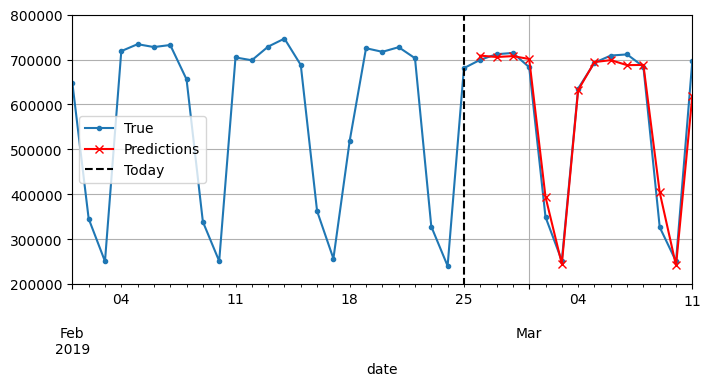

In [108]:
Y_pred = pd.Series(X[0, -14:, 0],
                   index=pd.date_range("2019-02-26", "2019-03-11"))

fig, ax = plt.subplots(figsize=(8, 3.5))
(rail_valid * 1e6)["2019-02-01":"2019-03-11"].plot(
    label="True", marker=".", ax=ax)
(Y_pred * 1e6).plot(
    label="Predictions", grid=True, marker="x", color="r", ax=ax)
ax.vlines("2019-02-25", 0, 1e6, color="k", linestyle="--", label="Today")
ax.set_ylim([200_000, 800_000]) #type: ignore
plt.legend(loc="center left")
plt.show()

**Second Method** is to train the RNN to predict the next 14 values in one shot. we  first  need  to  change  the  targets  to  be  vectors  containing  the  next  14
values.  To  do  this,  we  can  use  timeseries_dataset_from_array()  again,  but  this
time  asking  it  to  create  datasets  without  targets  (targets=None)  and  with  longer
sequences,  of  length  seq_length  +  14.  Then  we  can  use  the  datasets’  map()  method
to apply a custom function to each batch of sequences, splitting them into inputs and
targets.

In [109]:
def split_inputs_and_targets(mulvar_series,ahead=14,target_col=1):
    return mulvar_series[:,:-ahead],mulvar_series[:,-ahead:,target_col]

ahead_train_ds = tf.keras.utils.timeseries_dataset_from_array(
    mulvar_train.to_numpy(),
    targets = None,
    sequence_length = seq_length+14,
    batch_size = 32,
    shuffle=True,
    seed=42
).map(split_inputs_and_targets)

ahead_valid_ds = tf.keras.utils.timeseries_dataset_from_array(
    mulvar_valid.to_numpy(),
    targets=None,
    sequence_length=seq_length + 14,
    batch_size=32
).map(split_inputs_and_targets)

In [110]:
ahead_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32,input_shape=[None,5]),
    tf.keras.layers.Dense(14)
])

In [111]:
fit_and_evaluate(ahead_model,ahead_train_ds,ahead_valid_ds,0.02,300)

Epoch 1/300
33/33 [==============================] - 4s 29ms/step - loss: 0.1014 - mae: 0.3350 - val_loss: 0.0260 - val_mae: 0.1805
Epoch 2/300
33/33 [==============================] - 1s 15ms/step - loss: 0.0212 - mae: 0.1731 - val_loss: 0.0180 - val_mae: 0.1486
Epoch 3/300
33/33 [==============================] - 1s 18ms/step - loss: 0.0170 - mae: 0.1541 - val_loss: 0.0151 - val_mae: 0.1371
Epoch 4/300
33/33 [==============================] - 1s 17ms/step - loss: 0.0148 - mae: 0.1435 - val_loss: 0.0133 - val_mae: 0.1276
Epoch 5/300
33/33 [==============================] - 1s 16ms/step - loss: 0.0134 - mae: 0.1350 - val_loss: 0.0120 - val_mae: 0.1210
Epoch 6/300
33/33 [==============================] - 1s 16ms/step - loss: 0.0122 - mae: 0.1277 - val_loss: 0.0107 - val_mae: 0.1119
Epoch 7/300
33/33 [==============================] - 1s 22ms/step - loss: 0.0112 - mae: 0.1200 - val_loss: 0.0097 - val_mae: 0.1059
Epoch 8/300
33/33 [==============================] - 1s 22ms/step - loss: 0.

35770.781338214874

Now we predict the next 14 values all at once

In [112]:
X = mulvar_valid.to_numpy()[np.newaxis,:seq_length] #shape = [1,56,5]
Y_pred = ahead_model.predict(X) #shape = [1,14]

1/1 [==============================] - 1s 638ms/step


In [113]:
Y_pred

array([[0.69560593, 0.6826236 , 0.6966397 , 0.6794763 , 0.4006074 ,
        0.2712411 , 0.6592427 , 0.7191207 , 0.6652471 , 0.72398126,
        0.6692494 , 0.3784004 , 0.28912592, 0.64813614]], dtype=float32)

### <div style="font-family:fantasy;">Forecasting using Sequence-to-Sequence or <i>(seq2seq)</i> Model</div>


Instead of training the model to forecast the next 14 values only at the very last time
step, we can train it to forecast the next 14 values at each and every time step. In other words, we can turn this sequence-to-vector RNN into a sequence-to-sequence RNN.The advantage of this technique is that the loss will contain a term for the output of
the RNN at each and every time step, not just for the output at the last time step.

This means there will be many more error gradients flowing through the model, and
they won’t have to flow through time as much since they will come from the output of
each time step, not just the last one. This will both stabilize and speed up training.

To be clear, at time step 0 the model will output a vector containing the forecasts for
time steps 1 to 14, then at time step 1 the model will forecast time steps 2 to 15, and
so  on.  In  other  words,  the  targets  are  sequences  of  consecutive  windows,  shifted  by
one time step at each time step. The target is not a vector anymore, but a sequence of
the same length as the inputs, containing a 14-dimensional vector at each step

Now we have have each instance have a window as input and a sequence of windows as output.

So here we try to get windows of consecutive windows

In [152]:
my_series = tf.data.Dataset.range(7)
dataset = to_windows(my_series,3)
for i in list(dataset):print(i)
dataset = to_windows(to_windows(my_series,3),4)
list(dataset)

tf.Tensor([0 1 2], shape=(3,), dtype=int64)
tf.Tensor([1 2 3], shape=(3,), dtype=int64)
tf.Tensor([2 3 4], shape=(3,), dtype=int64)
tf.Tensor([3 4 5], shape=(3,), dtype=int64)
tf.Tensor([4 5 6], shape=(3,), dtype=int64)


[<tf.Tensor: shape=(4, 3), dtype=int64, numpy=
 array([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]], dtype=int64)>,
 <tf.Tensor: shape=(4, 3), dtype=int64, numpy=
 array([[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5],
        [4, 5, 6]], dtype=int64)>]

In [133]:
for s in list(dataset):
    print(s)
    print('\n')
for s in list(dataset):
    print(s.shape)
for s in list(dataset):
    print(s[:,0])
    print('\n')


tf.Tensor(
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]], shape=(4, 3), dtype=int64)


tf.Tensor(
[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]], shape=(4, 3), dtype=int64)


(4, 3)
(4, 3)
tf.Tensor([0 1 2 3], shape=(4,), dtype=int64)


tf.Tensor([1 2 3 4], shape=(4,), dtype=int64)




In [121]:
# using map to split the windows to inputs and targets
dataset = dataset.map(lambda s:(s[:,0],s[:,1:]))
list(dataset)

[(<tf.Tensor: shape=(4,), dtype=int64, numpy=array([0, 1, 2, 3], dtype=int64)>,
  <tf.Tensor: shape=(4, 2), dtype=int64, numpy=
  array([[1, 2],
         [2, 3],
         [3, 4],
         [4, 5]], dtype=int64)>),
 (<tf.Tensor: shape=(4,), dtype=int64, numpy=array([1, 2, 3, 4], dtype=int64)>,
  <tf.Tensor: shape=(4, 2), dtype=int64, numpy=
  array([[2, 3],
         [3, 4],
         [4, 5],
         [5, 6]], dtype=int64)>)]

Now the dataset contains sequences of length 4 as inputs, and the targets are sequen‐
ces  containing  the  next  two  steps,  for  each  time  step.  For  example,  the  first  input
sequence is [0, 1, 2, 3], and its corresponding targets are [[1, 2], [2, 3], [3, 4], [4, 5]],
which are the next two values for each time step.

Now we create a utility function to prepare the datasets for out sequence to sequence model

In [154]:
def to_seq2seq_dataset(series,seq_length=56,ahead=14,target_col=1,batch_size=32,shuffle=False,seed=None):
    ds = to_windows(tf.data.Dataset.from_tensor_slices(series),ahead+1)
    ds = to_windows(ds,seq_length).map(lambda s:(s[:,0],s[:,1:,1]))
    if shuffle:
        ds = ds.shuffle(8*batch_size,seed=seed)
    return ds.batch(batch_size)

In [155]:
seq2seq_train = to_seq2seq_dataset(mulvar_train,shuffle=True,seed=42)
seq2seq_valid = to_seq2seq_dataset(mulvar_valid)


In [156]:
seq2seq_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32,return_sequences=True,input_shape=[None,5]),
    tf.keras.layers.Dense(14)
])

In [157]:
fit_and_evaluate(seq2seq_model,seq2seq_train,seq2seq_valid,0.02,300)

Epoch 1/300
33/33 [==============================] - 5s 56ms/step - loss: 0.1150 - mae: 0.3676 - val_loss: 0.0321 - val_mae: 0.1952
Epoch 2/300
33/33 [==============================] - 1s 21ms/step - loss: 0.0223 - mae: 0.1637 - val_loss: 0.0178 - val_mae: 0.1454
Epoch 3/300
33/33 [==============================] - 1s 21ms/step - loss: 0.0153 - mae: 0.1345 - val_loss: 0.0139 - val_mae: 0.1250
Epoch 4/300
33/33 [==============================] - 1s 21ms/step - loss: 0.0123 - mae: 0.1187 - val_loss: 0.0115 - val_mae: 0.1119
Epoch 5/300
33/33 [==============================] - 1s 20ms/step - loss: 0.0106 - mae: 0.1083 - val_loss: 0.0101 - val_mae: 0.1031
Epoch 6/300
33/33 [==============================] - 1s 21ms/step - loss: 0.0094 - mae: 0.1008 - val_loss: 0.0091 - val_mae: 0.0973
Epoch 7/300
33/33 [==============================] - 1s 27ms/step - loss: 0.0085 - mae: 0.0948 - val_loss: 0.0082 - val_mae: 0.0918
Epoch 8/300
33/33 [==============================] - 1s 22ms/step - loss: 0.

50707.01614022255

t  is  almost  identical  to  our  previous  model:  the  only  difference  is  that  we  set
return_sequences=True in the SimpleRNN layer. This way, it will output a sequence of
vectors (each of size 32), instead of outputting a single vector at the last time step. The
Dense  layer  is  smart  enough  to  handle  sequences  as  input:  it  will  be  applied  at  each
time  step,  taking  a  32-dimensional  vector  as  input  and  outputting  a  14-dimensional
vector. In fact, another way to get the exact same result is to use a Conv1D layer with a
kernel size of 1: `Conv1D(14, kernel_size=1)`.

The  training  code  is  the  same  as  usual.  During  training,  all  the  model’s  outputs  are
used, but after training only the output of the very last time step matters, and the rest
can  be  ignored.  For  example,  we  can  forecast  the  rail  ridership  for  the  next  14  days
like this

In [158]:
X = mulvar_valid.to_numpy()[np.newaxis, :seq_length]
y_pred_14 = seq2seq_model.predict(X)[0, -1]  # only the last time step's output

1/1 [==============================] - 0s 396ms/step


In [159]:
Y_pred_valid = seq2seq_model.predict(seq2seq_valid)
for ahead in range(14):
    preds = pd.Series(Y_pred_valid[:-1, -1, ahead],
                      index=mulvar_valid.index[56 + ahead : -14 + ahead])
    mae = (preds - mulvar_valid["rail"]).abs().mean() * 1e6
    print(f"MAE for +{ahead + 1}: {mae:,.0f}")

3/3 [==============================] - 0s 31ms/step
MAE for +1: 27,057
MAE for +2: 32,213
MAE for +3: 32,551
MAE for +4: 33,393
MAE for +5: 30,891
MAE for +6: 37,120
MAE for +7: 40,432
MAE for +8: 34,626
MAE for +9: 33,440
MAE for +10: 41,753
MAE for +11: 37,815
MAE for +12: 39,821
MAE for +13: 38,985
MAE for +14: 33,831


As we can see the performance drops gradually as the model tries to forecast into the further into the future. 